In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
def getROCCurve(res_df, threshold):
    res_df['Actual BNPP'] = res_df['Actual ln BNPP'].apply(lambda x: np.exp(x))
    res_df['Predicted BNPP'] = res_df['Predicted ln BNPP'].apply(lambda x: np.exp(x))
    y_true = res_df['Actual BNPP'].apply(lambda x: x > threshold).to_numpy()
    y_pred = res_df['Predicted BNPP']
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

In [3]:
def plotROCCurves(rocs, labels, title, filename=''):
    plt.figure(figsize=(8, 8))
    for i, (fpr, tpr, roc_auc) in enumerate(rocs):
        plt.plot(fpr, tpr, lw=1.5, label=labels[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    if filename != '':
        plt.savefig(filename)
    plt.show()

In [4]:
def getPearsonR(df):
    return np.corrcoef(df['Actual ln BNPP'], df['Predicted ln BNPP'])[0][1]

In [5]:
result_csvs = ['results/results_resnet64.csv', 'results/results_resnet128.csv', 'results/results_resnet256.csv', 'results/results_resnet512.csv', 'results/results_resnet1024.csv']
dfs = [pd.read_csv(csv) for csv in result_csvs]

rocs = [getROCCurve(df, 300) for df in dfs]
labels = [f'img_size: {result_csvs[i].split("resnet")[1].split(".")[0]} (AUC {roc_auc:.3f})' for i, (fpr, tpr, roc_auc) in enumerate(rocs)]
title = 'Pulmonary Edema Detection ROC Curve Resnet152, Threshold > 300'

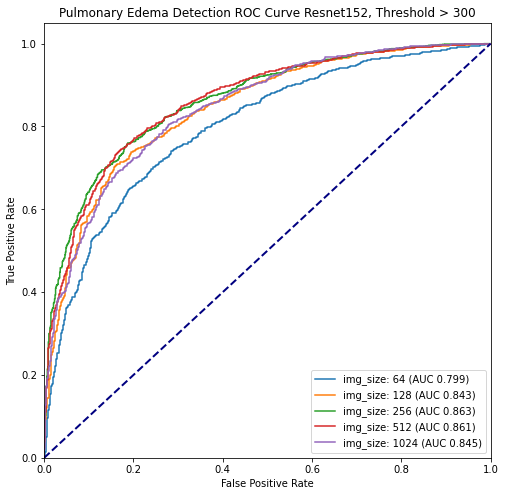

In [6]:
plotROCCurves(rocs, labels, title, filename='plots/ImgSizeROC.png')

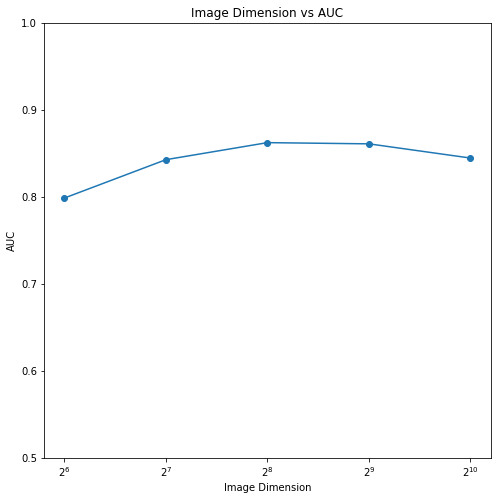

In [7]:
aucs = [roc[2] for roc in rocs]
plt.figure(figsize=(8,8))
plt.xscale('log', base=2)
plt.plot([64*2**i for i in range(5)], aucs, marker='o')
plt.ylim([0.5, 1])
plt.xlabel('Image Dimension')
plt.ylabel('AUC')
plt.title('Image Dimension vs AUC')
plt.savefig('plots/dimVSauc.png')
plt.show()

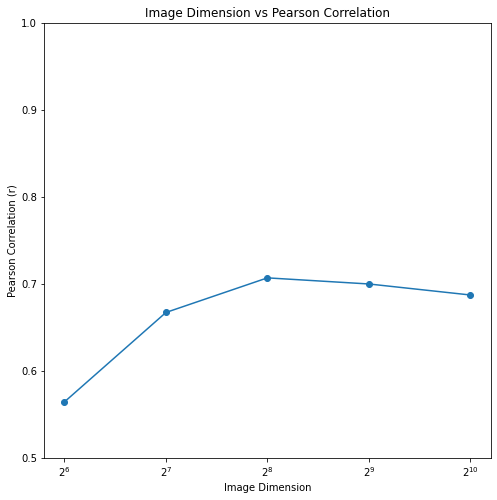

In [8]:
pearsons = [getPearsonR(pd.read_csv(csv)) for csv in result_csvs]
plt.figure(figsize=(8,8))
plt.xscale('log', base=2)
plt.plot([64*2**i for i in range(5)], pearsons, marker='o')
plt.ylim([0.5, 1])
plt.xlabel('Image Dimension')
plt.ylabel('Pearson Correlation (r)')
plt.title('Image Dimension vs Pearson Correlation')
plt.savefig('plots/dimVSr.png')
plt.show()

In [9]:
best_ix = np.argmax([roc[2] for roc in rocs])
thresholds = [50, 75, 125, 250, 300, 450, 900, 1800, 5000]

rocs = [getROCCurve(dfs[best_ix], thresh) for thresh in thresholds]
labels = [f'BNPP > {thresholds[i]} (AUC {roc_auc:.3f})' for i, (fpr, tpr, roc_auc) in enumerate(rocs)]
title = 'Pulmonary Edema Detection Resnet152 Image size of 256, Various Thresholds'

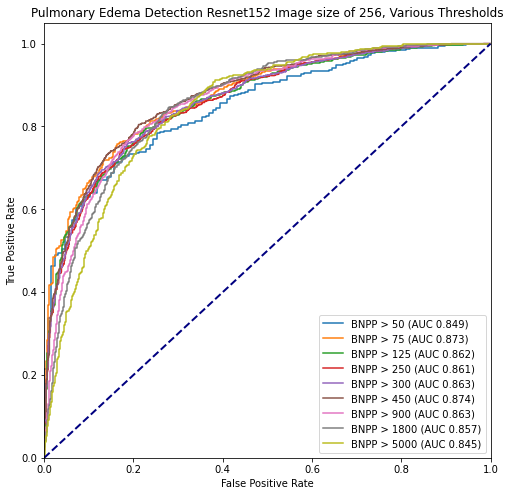

In [10]:
plotROCCurves(rocs, labels, title, 'plots/resnet256VSthreshold.png')